# Bike Sharing Assignment

<b> Problem Statement </b>

BoomBikes aspires to understand the demand for shared bikes among the people so as to strategise business plan after this ongoing quarantine situation ends across the nation due to Covid-19.<br>

They want to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know: <br>
- Which variables are significant in predicting the demand for shared bikes.<br>
- How well those variables describe the bike demands <br>



<h3> Business Goal </h3>

It is required to model the demand for shared bikes with the available independent variables. This will be further used by the management to understand how exactly the demands vary with different features.Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Step 1 Reading and Understanding the data

In [1]:
#importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
data = pd.read_csv('Bike Sharing dataset.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Inspecting the data file
print("Size of the bike sharing data: ",data.size)
print("Shape of the bike sharing data: ",data.shape)

Size of the bike sharing data:  11680
Shape of the bike sharing data:  (730, 16)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data quality checks 

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#column-wise null percentage of the application data
p = round((data.isnull().sum()/len(data.index))*100,2)
print("column wise percentage in df1- application data", p)

column wise percentage in df1- application data instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


There are no missing or null values in the data

 #### Data Understanding

In [8]:
# printing info and first 5 rows of data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB
None


In [9]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We can understand the following based on the data dictionary <br>

1) instant - This variables records the index. This will not be important for the data and hence can be removed. <br>

2)dteday - This variable refers to date (DD/MM/YYYY) on which the bike is rented/booked. Since there are 'yr' and 'mnth' variables already available and derived from dteday. We can drop this variable. <br>

3) Season - This is a categorical variable with values of season as
             (1:spring, 2:summer, 3:fall, 4:winter). But the data type is given
             as 'int'. Hence , we need to change this to object data type. <br>
             
4) yr: This is a binary variable, where in year (0: 2018, 1:2019). <br>

5) mnth : This is also a categorical variable ,wherein month ( 1 to 12).But the data type is given as 'int'. Hence , we need to change this to object data type.<br>

6) Holiday: This is again binary variable (0/1) which represents weather day is a holiday or not <br>

7) weekday : day of the week represented as 6,0,1.Lets consider that 6=Sat;0=Sun;1=Mon...5=Friday. Since this is also a categorical naming variable we can consider to change the data type to object. <br>

8) workingday : if day is neither weekend nor holiday is 1, otherwise is 0. <br>

9) temp : temperature in Celsius <br>

10) atemp: feeling temperature in Celsius <br>

11) weathersit : This should be a categorical variable of data type object. Since each number from 1 to 4 represents the weather. <br>

12) hum: humidity <br>

13) windspeed: wind speed <br>

14) casual: count of casual users <br>

15)  registered: count of registered users <br>

16)  cnt: count of total rental bikes including both casual and registered. Since cnt already represents that it is total of casual and registered , we can remove the 'casual' and 'registered' variables from dataset.


#### Droping the redundant variables

- Since cnt already represents that it is total of casual and registered , we can remove the 'casual' and 'registered' variables from dataset.

- instant - This variable records the index. This will not be important for the data and hence can be removed. 

- Since there are 'yr' and 'mnth' variables already available and derived from dteday. We can drop "dteday" variable. 

In [10]:
#Droping instant, casual , registered from data
data.drop(columns={'instant','dteday','casual','registered'},inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB
None


### Mapping the binary data to names 

Mapping the columns- season, mnth, weekday, weathersit to the names as mentioned in the meta data file


As observed in the prior steps, we can change the data type of following variables.
-"Season" - This is a categorical variable with values of season as (1:spring, 2:summer, 3:fall, 4:winter). But the data type is given as 'int'. Hence , we need to change this to object data type. 

-"mnth" : This is also a categorical variable ,wherein month ( 1 to 12).But the data type is given as 'int'. Hence , we need to change this to object data type.

-"weekday" : Given datatype is int. But this variable represents the day of the week represented as 6,0,1.Lets consider that 6=Sat;0=Sun;1=Mon...5=Friday. Since this is also a categorical naming variable we can consider to change the data type to object. 

-"weathersit" : This should be a categorical variable of data type object. Since each number from 1 to 4 represents the weather

In [12]:
#changing the datatype to object for categorical variables.

names = ['season','mnth','weekday','weathersit']
for i in names:
    data[i] = data[i].astype("object")

In [13]:
# intially re-assigning the names to the categories as defined in the metadata 

for i in range(len(data['season'])):
    if data['season'][i] == 1:
        data['season'][i] = 'spring'
    elif data['season'][i] == 2:
        data['season'][i] = 'summer'
    elif data['season'][i] == 3:
        data['season'][i] = 'fall'
    elif data['season'][i] == 4:
        data['season'][i] = 'winter'

In [14]:
data['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [15]:
# intially re-assigning the names to the categories as defined in the metadata 
for i in range(len(data['mnth'])):
    if data['mnth'][i] == 1:
        data['mnth'][i] = 'Jan'
    elif data['mnth'][i] == 2:
        data['mnth'][i] = 'Feb'
    elif data['mnth'][i] == 3:
        data['mnth'][i] = 'Mar'
    elif data['mnth'][i] == 4:
        data['mnth'][i] = 'April'
    elif data['mnth'][i] == 5:
        data['mnth'][i] = 'May'
    elif data['mnth'][i] == 6:
        data['mnth'][i] = 'June'
    elif data['mnth'][i] == 7:
        data['mnth'][i] = 'July'
    elif data['mnth'][i] == 8:
        data['mnth'][i] = 'Aug'
    elif data['mnth'][i] == 9:
        data['mnth'][i] = 'Sept'
    elif data['mnth'][i] == 10:
        data['mnth'][i] = 'Oct'
    elif data['mnth'][i] == 11:
        data['mnth'][i] = 'Nov'
    elif data['mnth'][i] == 12:
        data['mnth'][i] = 'Dec'

In [16]:
data['mnth'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

In [17]:
## intially re-assigning the names to the categories as defined in the metadata 
for i in range(len(data['weekday'])):
    if data['weekday'][i] == 6:
        data['weekday'][i] = 'sat'
    elif data['weekday'][i] == 0:
        data['weekday'][i] = 'sun'
    elif data['weekday'][i] == 1:
        data['weekday'][i] = 'mon'
    elif data['weekday'][i] == 2:
        data['weekday'][i] = 'tue'
    elif data['weekday'][i] == 3:
        data['weekday'][i] = 'wed'
    elif data['weekday'][i] == 4:
        data['weekday'][i] = 'thurs'
    elif data['weekday'][i] == 5:
        data['weekday'][i] = 'fri'

In [18]:
data['weekday'].head()

0    sat
1    sun
2    mon
3    tue
4    wed
Name: weekday, dtype: object

In [19]:
## intially re-assigning the names to the categories as defined in the metadata 
for i in range(len(data['weathersit'])):
    if data['weathersit'][i] == 1:
        data['weathersit'][i] = 'clear'
    elif data['weathersit'][i] == 2:
        data['weathersit'][i] = 'mist&cloudy'
    elif data['weathersit'][i] == 3:
        data['weathersit'][i] = 'Lightsnow'
    elif data['weathersit'][i] == 4:
        data['weathersit'][i] = 'Heavysnow'

In [20]:
data['weathersit'].head()

0    mist&cloudy
1    mist&cloudy
2          clear
3          clear
4          clear
Name: weathersit, dtype: object

In [21]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 57.1+ KB


### Visualizing data to understand the relationship

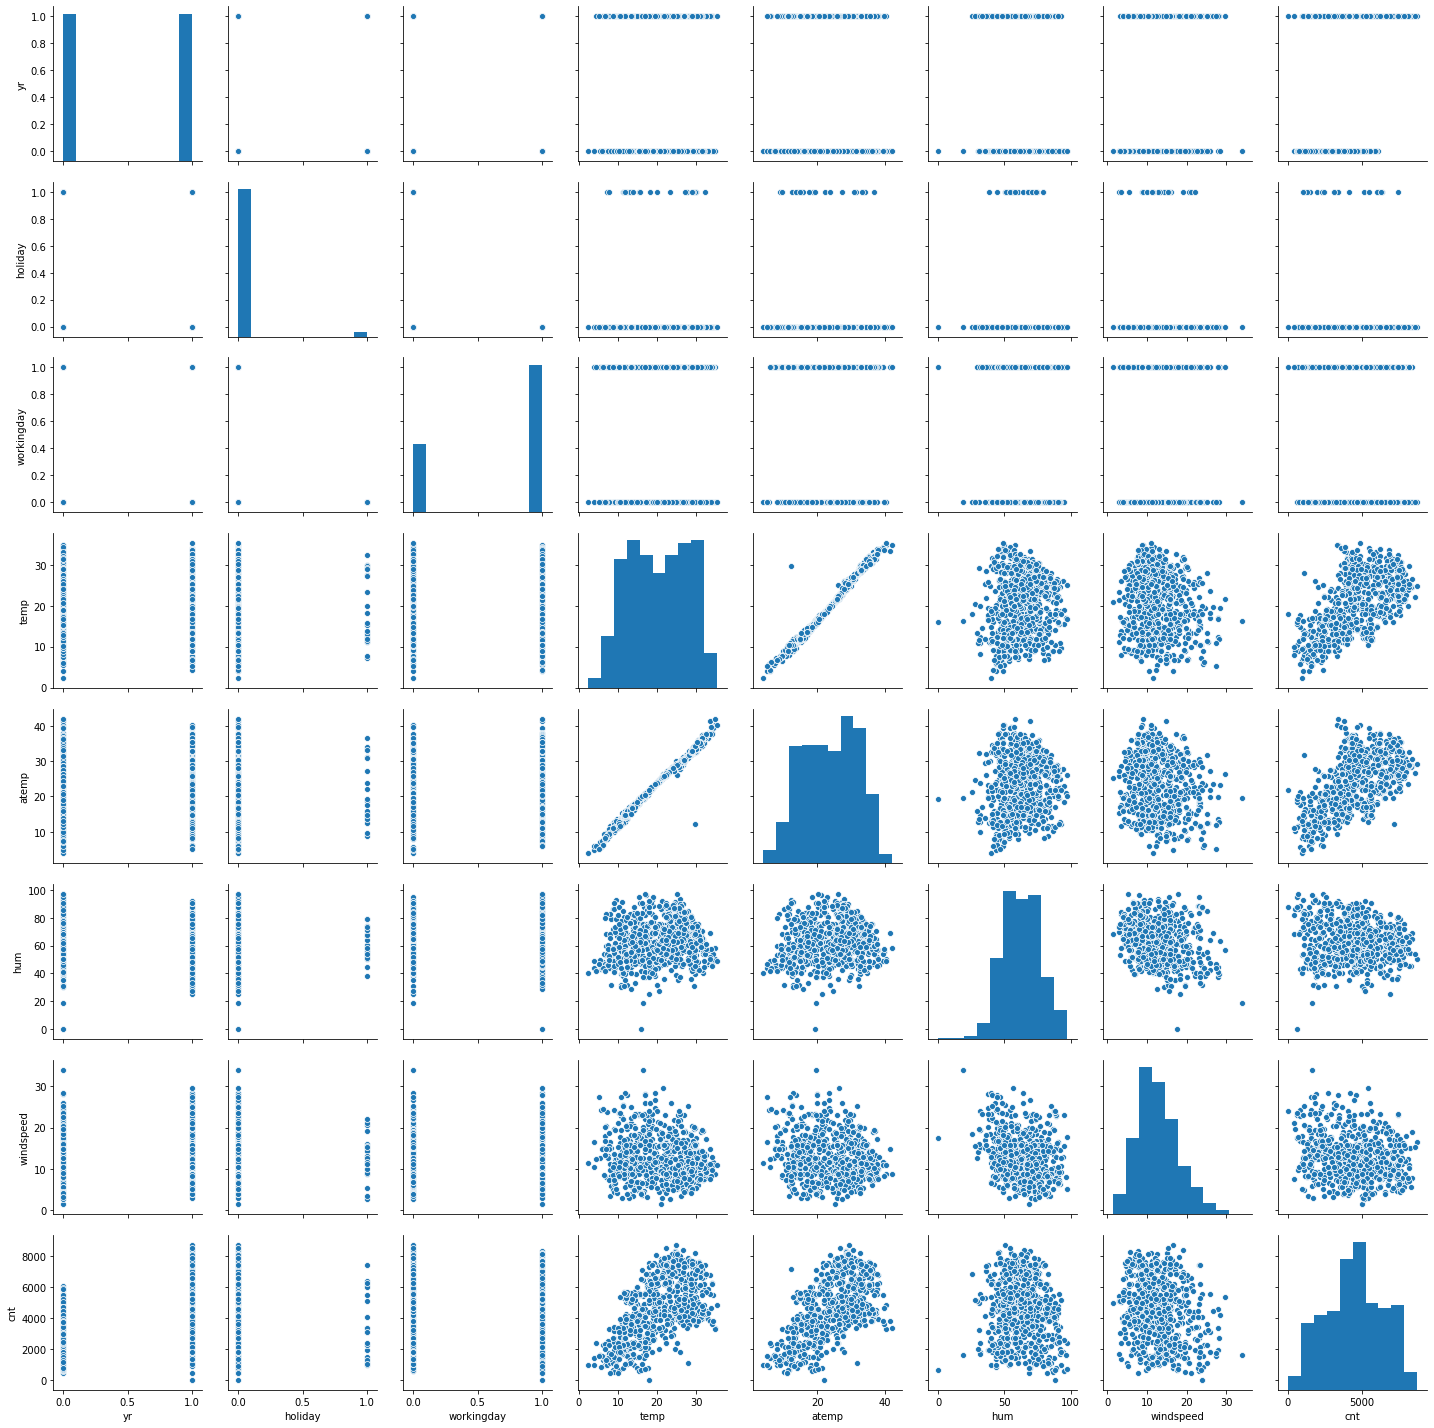

In [22]:
#visualizing the data
sns.pairplot(data)
plt.show()

Observing the graphs more closely with respect to out target variable 'cnt'. To understand if Linear regression makes sense or not.

<Figure size 1800x1440 with 0 Axes>

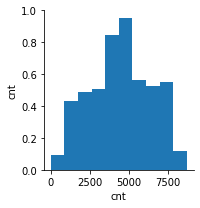

In [23]:
#observing the garphs with cnt
plt.figure(figsize=(25,20))
sns.pairplot(data,height=3,x_vars = 'cnt', y_vars=['cnt'])
plt.show()

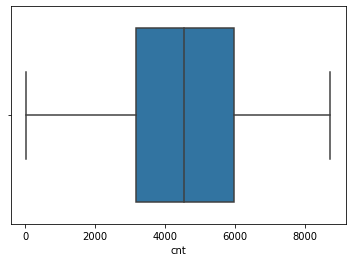

In [24]:
sns.boxplot(x=data['cnt'])
plt.show()

The above distribution of 'cnt' shows that there are no outliers in the data . And the 'cnt' distribution is normally distributed without any spikes or suspicious distribution.

<h3>visualizing the numerical variables</h3>

<Figure size 72x360 with 0 Axes>

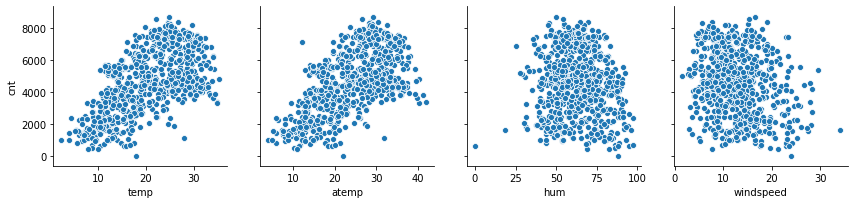

In [25]:
#visualizing the numerical variables
plt.figure(figsize=(1,5))
sns.pairplot(data,height=3,y_vars = 'cnt', x_vars=['temp','atemp','hum','windspeed'])
plt.show()

- From the above first and second graphs,we can observe that some of the variance in cnt is explained by the temp, atemp. And temp,atemp looks like a good predictor for the demand. As the count of bikes rented might depend on the temperature and rider's feeling temperature.  <br>

- Similarly is the case with the 'hum' and 'windspeed' also describes at least some of the variance in 'cnt'. As the humidity and windspeed on a particular day might impact the people borrow the bike for commute. <br>

- Hence, we can say that the numeric variables as above show some kind of linear relationship with the 'cnt' target variable.

<h3> visualizing the categorical variables using scatterplot and boxplot </h3>

<Figure size 144x360 with 0 Axes>

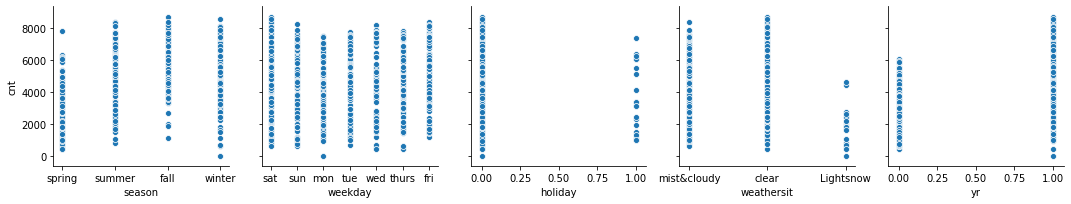

In [26]:
#visualizing the categorical variables
plt.figure(figsize=(2,5))
sns.pairplot(data,height=3,y_vars = 'cnt', x_vars=['season','weekday','holiday','weathersit','yr'])
plt.show()


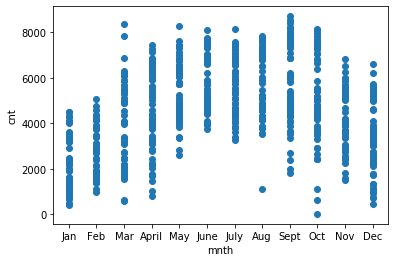

In [27]:
plt.scatter(data['mnth'],data['cnt'])
plt.ylabel('cnt')
plt.xlabel('mnth')
plt.show()

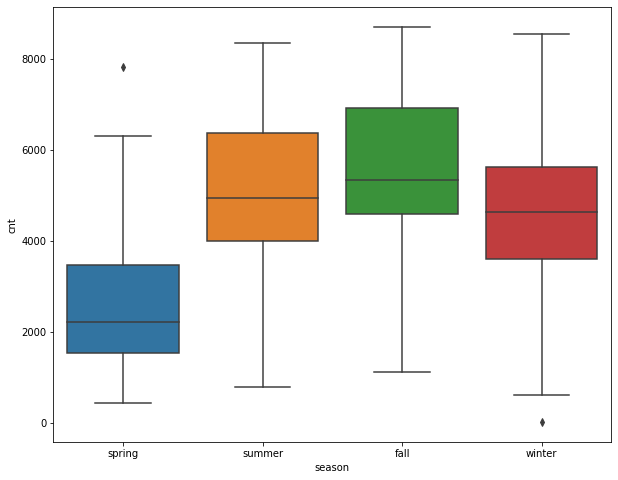

In [28]:
# visualizing through boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='season',y='cnt',data=data)
plt.show()

In the above plot, season is categorical with values as (1:spring, 2:summer, 3:fall, 4:winter). <br>
If the season is 'Spring' we can see the that cnt distribution is significatnly lower compared to the other seasons. <br>
And there is significant overlap in the data when the season is summer, fall and winter. Hence, we can say that season shows some kind of dependency on the bikes borrowed by the customers. <br>

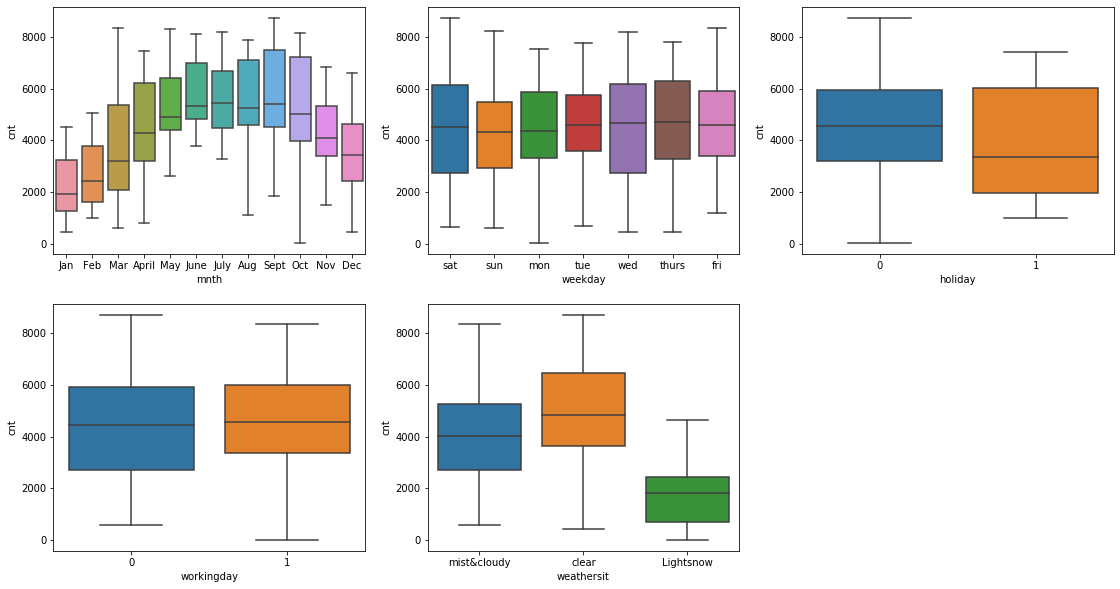

In [29]:
# observing other categorical plots
# visualizing through boxplot

plt.figure(figsize=(19,10))
plt.subplot(2,3,1)
sns.boxplot(x='mnth',y='cnt',data=data)

plt.subplot(2,3,2)
sns.boxplot(x='weekday',y='cnt',data=data)

plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=data)

plt.subplot(2,3,4)
sns.boxplot(x='workingday',y='cnt',data=data)

plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=data)

            
plt.show()

From the above plots, we can observe that there is significant difference on the bikes borrowed  <br>
mnth vs cnt - Based on the above graph, we can infer that the ‘cnt’ distribution i.e count of total rental bikes is significantly lower in month of Jan and is higher in the month of Sept. We can see there is significant overlap in the data during the month from May to October. Hence, we can say that mnth shows some kind of dependency on the bikes borrowed by the customers only during particular months.<br>

Weekday vs cnt - We can observe a significant pattern of ‘cnt’ distribution during all the days. With ‘cnt’ higher during the Saturday and lower during the Monday <br>

Holiday vs cnt- when holiday =0, ‘cnt’ distribution is significantly higher compared to holiday=1. <br>

Workingday vs  cnt-  when workingday=0 i.e. either weekend or holiday cnt distribution is higher when compared to workingday=1.<br>

weathersit vs cnt:  when weather is Lightsnow , cnt distribution is significantly lower compared  and  is higher when weather is clear.And there is slight difference in the cnt when the weather is mist&cloundy and clear.<br>


Hence, these graphs helps us to clearly understand that there are variables which can be good predictors for our target variable 'cnt'.

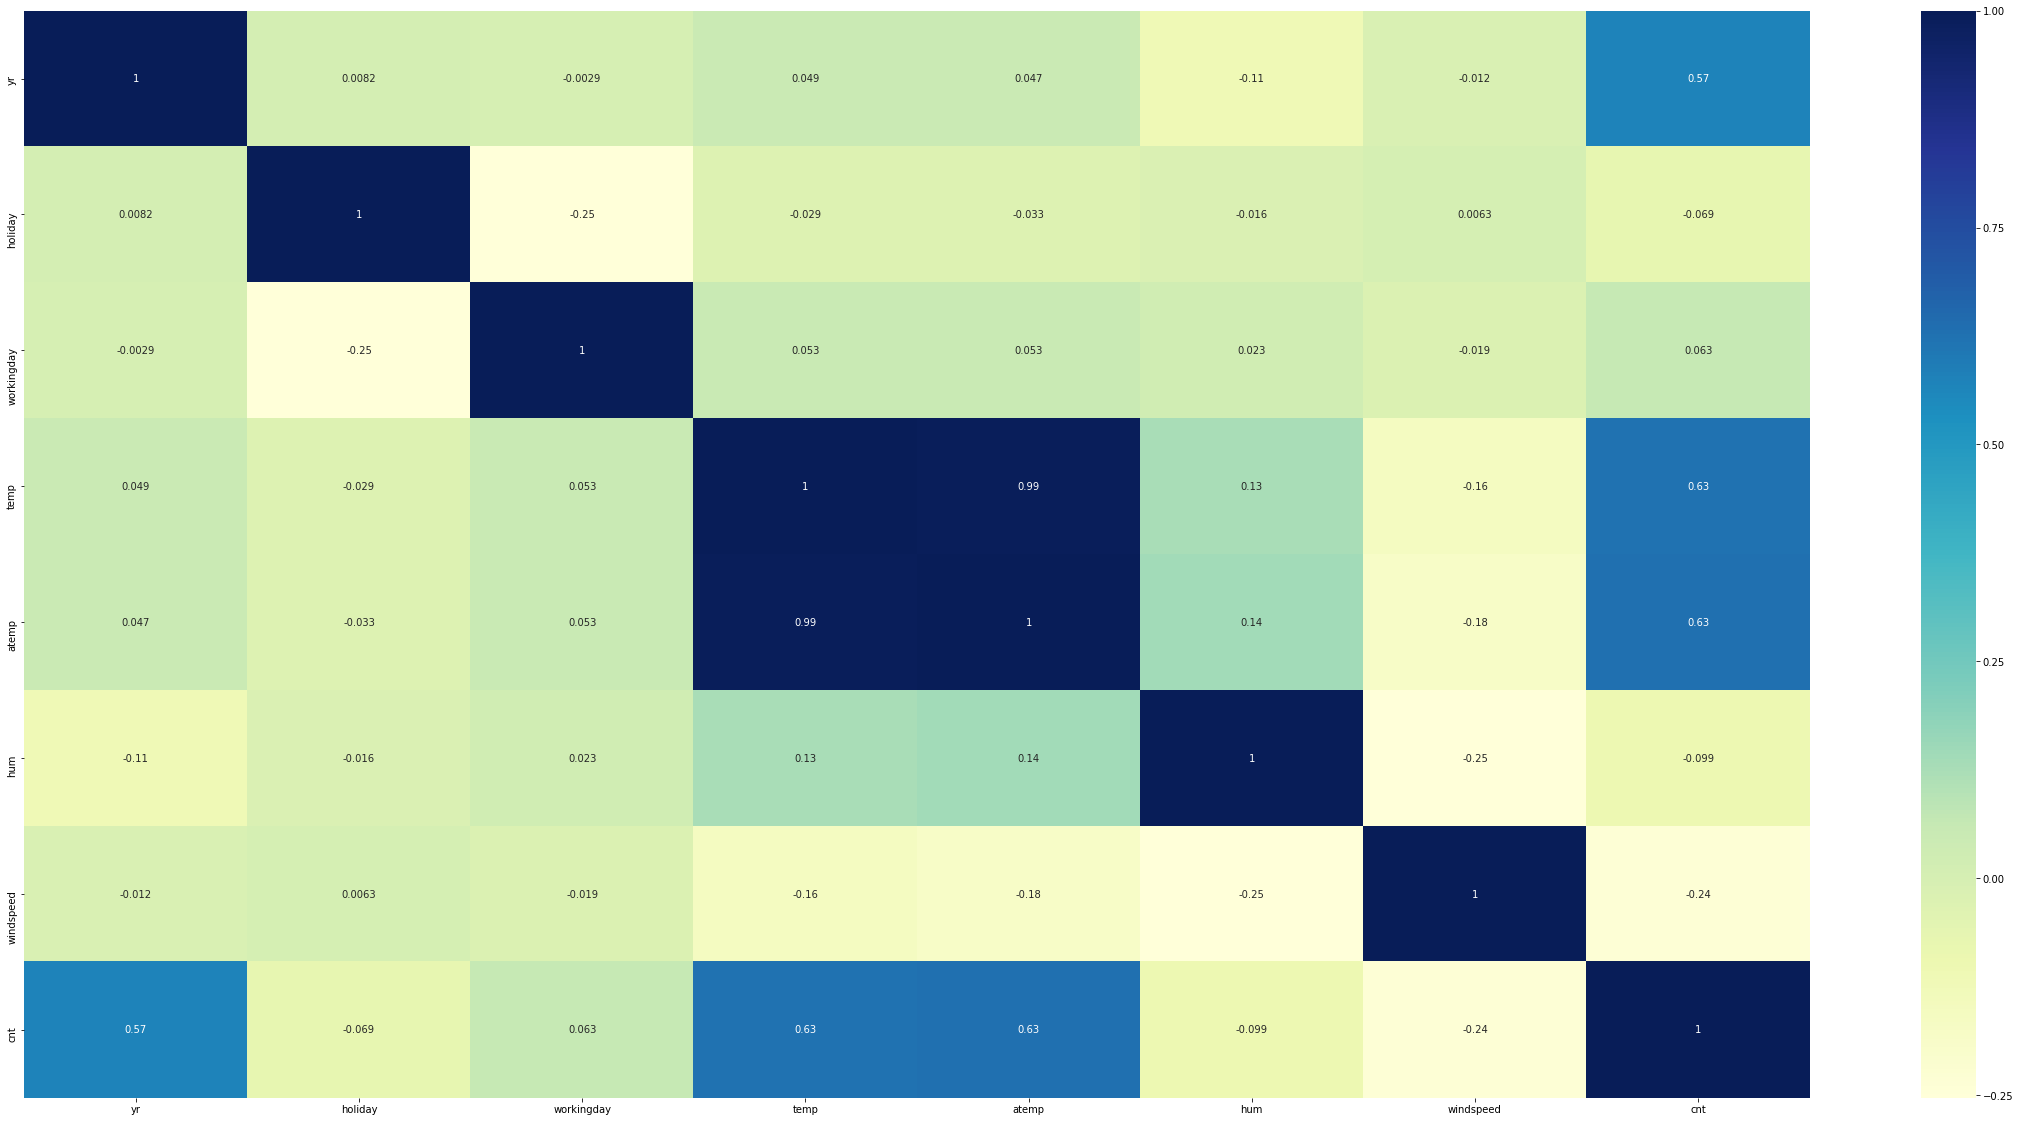

In [30]:
# heatmap to understand the correlation between the variables
plt.figure(figsize=(40,20))
ax= sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Based on the above heat map we can observe that the correlation coeff is very high between temp and atemp.
And corrleation between that 'cnt'-target variable and temp, atemp is high at 0.63. This is followed by the variable yr with coeff-0.53.

At this point in the data, in order to avoid correlation between the independent variables and avoid further nuances we can at this step drop either temp or atemp. Hence, dropping 'temp' variable here.

In [31]:
data.drop(columns={'temp'},inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,mist&cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,mist&cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,clear,11.46350,43.6957,12.522300,1600


# Step 2: Data Preparation

encoding: converstion binary categorical to 1's and 0's
other categorical variables to dummy variables.

The below binary variables are already converted to 0's and 1's:
1) yr : year (0: 2018, 1:2019)
2) holiday : weather day is a holiday or not
3) workingday : if day is neither weekend nor holiday is 1, otherwise is 0.


### (a) Dummy variables for all categorical variables

 creating dummy variables to the below categorical variables  <br>
 1) season : season (1:spring, 2:summer, 3:fall, 4:winter) <br>
 2) mnth : month ( 1 to 12) <br>
 3) weathersit : <br>
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
 4) weekday : day of the week

### creating dummy variables for 'season' variable

In [32]:
# rechecking the season variable values in data
data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [33]:
# creating the dummy vars for season variables
dummy_season = pd.get_dummies(data['season'],drop_first=True)
dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


The above dummy variables with binary data can be intrepreted as - <br>

-100 will correspond to Spring <br>
-010 will correspond to summer <br>
-001 will correspond to winter <br>
-000 will correspond to fall

In [34]:
# concat the dummy variable to orginal data
data = pd.concat([data,dummy_season],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,sat,0,mist&cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,sun,0,mist&cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,mon,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,tue,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,wed,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


In [35]:
#removing the season variable as this is now represented by dummy variables
data = data.drop('season',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
dtypes: float64(3), int64(4), object(3), uint8(3)
memory usage: 50.7+ KB


### creating dummy variables for '' mnth" variable

In [36]:
#rechecking the mnth variable values
data['mnth']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [37]:
data['mnth'].value_counts(normalize= True)

Mar      0.084932
Dec      0.084932
Oct      0.084932
July     0.084932
Aug      0.084932
May      0.084932
Jan      0.084932
Sept     0.082192
April    0.082192
June     0.082192
Nov      0.082192
Feb      0.076712
Name: mnth, dtype: float64

In [38]:
#Now, creating dummy variables for the 'mnth' variable
dummy_mnth = pd.get_dummies(data['mnth'], drop_first= True)
dummy_mnth

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [39]:
# concat the dummy variables to data
data = pd.concat([data,dummy_mnth],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
Aug           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Jan           730 non-null uint8
July          730 non-null uint8
June          730 non-null uint8
Mar           730 non-null uint8
May           730 non-null uint8
Nov           730 non-null uint8
Oct           730 non-null uint8
Sept          730 non-null uint8
dtypes: float64(3), int64(4), object(3), uint8(14)
memory usage: 58.5+ KB


In [40]:
# drop the 'mnth variables'
data.drop('mnth',axis=1,inplace=True)
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,sat,0,mist&cloudy,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist&cloudy,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,clear,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,clear,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


### creating dummy variables for 'weekday' variable


In [41]:
# checkind the data in weekday variable
data['weekday'].head()

0    sat
1    sun
2    mon
3    tue
4    wed
Name: weekday, dtype: object

In [42]:
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,sat,0,mist&cloudy,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist&cloudy,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,clear,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,clear,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [43]:
data['weekday'].value_counts()

sat      105
sun      105
mon      105
thurs    104
tue      104
fri      104
wed      103
Name: weekday, dtype: int64

In [44]:
#creating dummy variables for weekday column
dummy_weekday = pd.get_dummies(data['weekday'],drop_first=True)
dummy_weekday

,mon,sat,sun,thurs,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [45]:
# concat data and dummy_weekday
data = pd.concat([data,dummy_weekday],axis=1)
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sept,mon,sat,sun,thurs,tue,wed
0,0,0,sat,0,mist&cloudy,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,sun,0,mist&cloudy,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,mon,1,clear,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,tue,1,clear,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,wed,1,clear,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [46]:
#dropping weekday variable
data.drop('weekday',axis=1,inplace=True)
data.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,mon,sat,sun,thurs,tue,wed
0,0,0,0,mist&cloudy,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist&cloudy,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### creating dummy variables for 'weathersit' variable


In [47]:
data['weathersit'].head()

0    mist&cloudy
1    mist&cloudy
2          clear
3          clear
4          clear
Name: weathersit, dtype: object

In [48]:
data['weathersit'].value_counts()

clear          463
mist&cloudy    246
Lightsnow       21
Name: weathersit, dtype: int64

In [49]:
#creating dummy variables
dummy_weathersit = pd.get_dummies(data['weathersit'],drop_first=True)
dummy_weathersit

,clear,mist&cloudy
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
725,0,1
726,0,1
727,0,1
728,1,0


In [50]:
# concat the dummy variable to data
data = pd.concat([data, dummy_weathersit],axis=1)
data.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,mon,sat,sun,thurs,tue,wed,clear,mist&cloudy
0,0,0,0,mist&cloudy,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,mist&cloudy,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,clear,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,clear,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,clear,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [51]:
# dropping weathersit variable
data.drop('weathersit',axis=1,inplace=True)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,mon,sat,sun,thurs,tue,wed,clear,mist&cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


<h2>b) Splitting into Train and Test </h2>

In [52]:
# importing the required packages for splitting the data
import sklearn
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
#shape of test and train data
print("shape of train " ,data_train.shape)
print("shape of test " ,data_test.shape)

shape of train  (510, 29)
shape of test  (219, 29)


<h2> c) Rescaling the features </h2>

Rescaling the below continuous variables for better interpretation of the data while modelling-

- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed

Here, we are using the Min-Max scaling techniques so as to to normalize the data between 0 and 1.

In [55]:
# importing the required packages
from sklearn.preprocessing import MinMaxScaler

In [56]:
# instatiate the object
scaler = MinMaxScaler()

#creating list of numeric variables
num_vars = ['atemp','hum','windspeed']

# Fit on Data
data_train[num_vars]= scaler.fit_transform(data_train[num_vars])
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,mon,sat,sun,thurs,tue,wed,clear,mist&cloudy
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [57]:
# to verify that the variables are indeed normalized
data_train[num_vars].describe()

,atemp,hum,windspeed
count,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768
std,0.212385,0.145882,0.169797
min,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179
50%,0.526811,0.653714,0.296763
75%,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000


In the above step, we can observe that the min value =0 and max value =1. Hence, these numeric variables are now normalized.

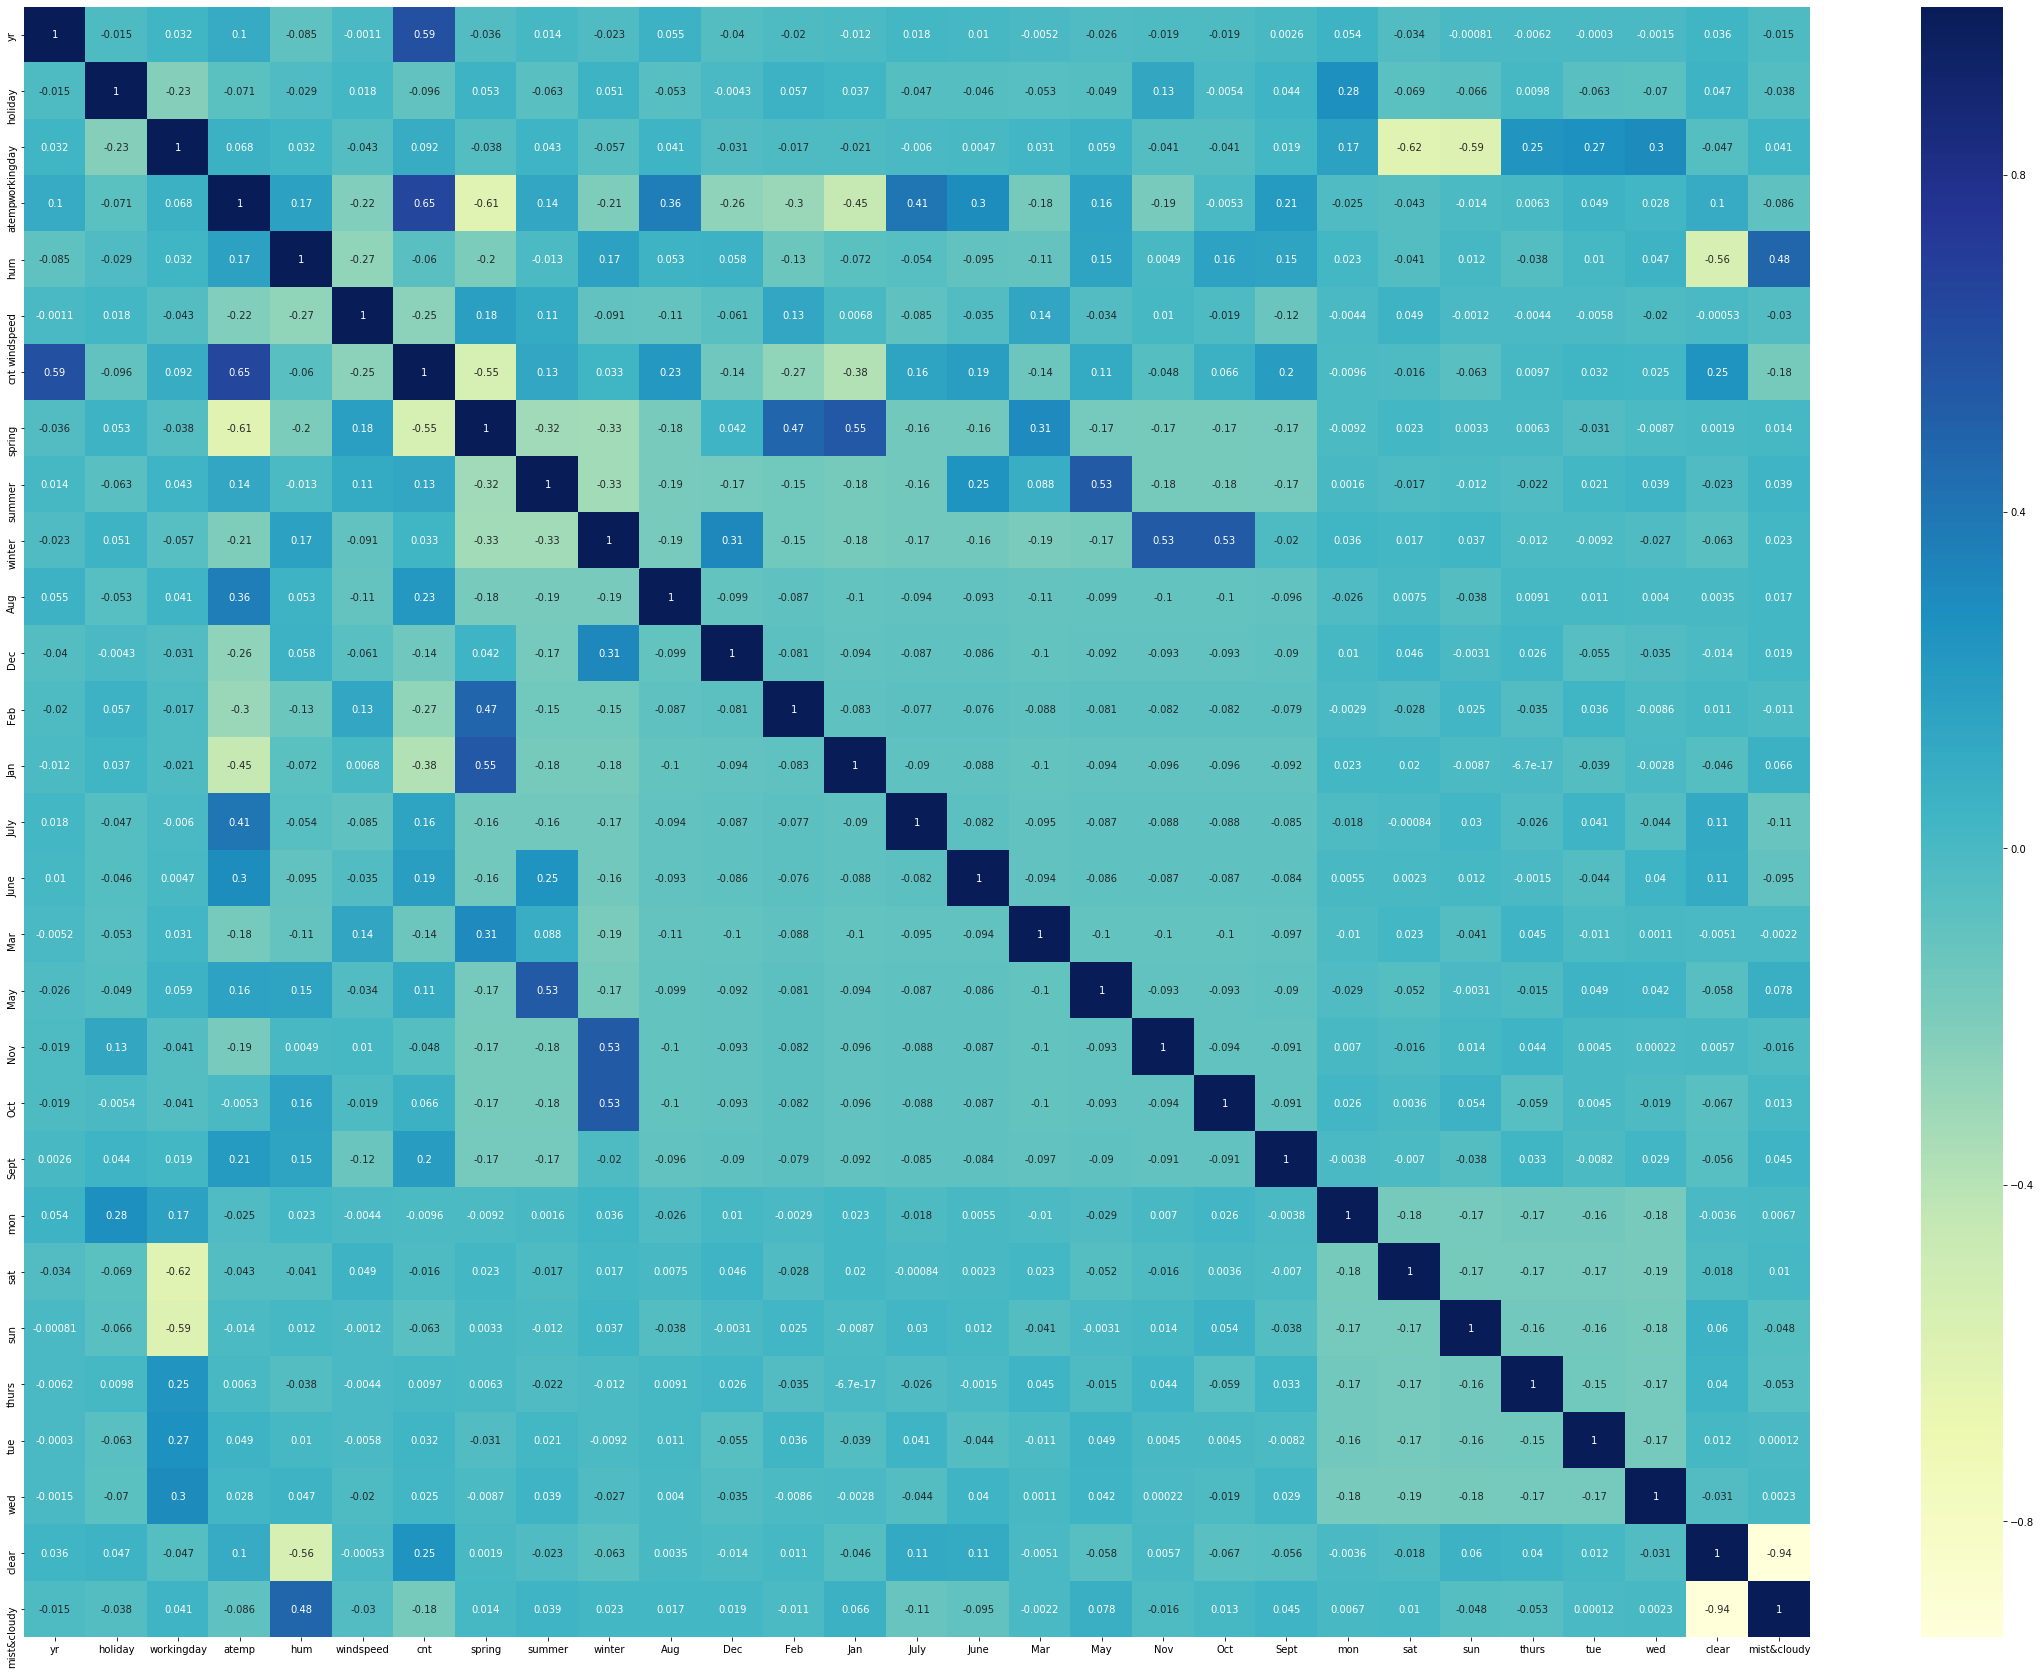

In [58]:
# checking the correlation between the features in the data
plt.figure(figsize = (40, 30))
x= sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
bottom, top = x.get_ylim()
x.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

As we can see atemp and yr are now corelated with target variable.

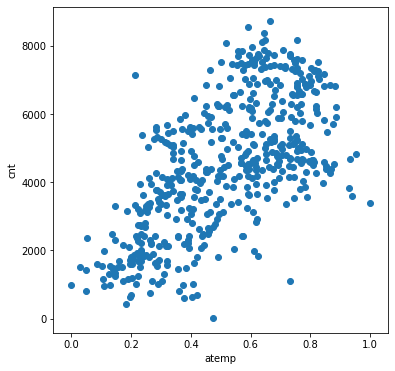

In [59]:
# to cross check the correaltion between the cnt and atemp
plt.figure(figsize=[6,6])
plt.scatter(data_train.atemp,data_train.cnt)
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

# Step 3: Training the Model

Dividing the train data into y_train which stores our target variable 'cnt'. And x_train which stores all the other predictor/independent variables

In [60]:
y_train = data_train.pop('cnt')
X_train = data_train

In [61]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


# a) Feature selection using RFE

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thurs', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('clear', True, 1),
 ('mist&cloudy', True, 1)]

In [65]:
#creating list for all the top 15 RFE variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Jan', 'July', 'Sept', 'sat', 'sun', 'clear', 'mist&cloudy'],
      dtype='object')

### Builiding the model using stats model

In [66]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.66e-188
Time:                        05:36:55   Log-Likelihood:                -4115.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         493.7230    319.010      1.548      

In [70]:
#checking for VIF of the feature cariables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
#creating data frames that contains feature variables and there values
vif = pd.DataFrame()
#X = X_train_rfe
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,sat,inf
13,sun,inf
14,clear,10.23
15,mist&cloudy,8.87
4,atemp,3.11
7,spring,2.66
5,hum,1.90
8,winter,1.75


### Dropping the 'sun' variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 'sun' as it has a very high p-value of 0.825. Let's go ahead and drop this variables

In [72]:
#dropping the variable 'sun' which has high p value and high VIF
X_train_new = X_train_rfe.drop(["sun"], axis=1)

In [73]:
#building the second fitted model without 'sun'
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.66e-188
Time:                        05:36:55   Log-Likelihood:                -4115.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         525.7877    407.890      1.289      

In [74]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,22.37
3,atemp,19.99
12,clear,13.04
13,mist&cloudy,8.42
2,workingday,5.39
5,windspeed,4.34
6,spring,3.26
7,winter,2.20
0,yr,2.09
11,sat,1.99


<h2>Dropping the variable'hum' and updating the model</h2>

As you might have noticed, all the p values are less than 0.05. Hence, going with high vif value- wherein in hum has very high vif value and dropping this variable.

In [75]:
#dropping 'hum'
X_train_new = X_train_new.drop(['hum'], axis=1)

In [76]:
#building third fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.51e-186
Time:                        05:36:55   Log-Likelihood:                -4122.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -507.7023    309.651     -1.640      

In [77]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,13.48
11,clear,12.71
12,mist&cloudy,7.17
2,workingday,5.25
4,windspeed,4.32
5,spring,2.94
0,yr,2.07
10,sat,1.97
6,winter,1.71
7,Jan,1.67


<h2> Droppong variable 'holiday' and rebuild fourth model </h2>

'holiday' variable has high p value of > 0.05. Hence, dropping this variable

In [78]:
#dropping 'holiday'
X_train_new = X_train_new.drop(['holiday'], axis=1)

In [79]:
#building fourth fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          6.35e-187
Time:                        05:36:55   Log-Likelihood:                -4124.8
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     497   BIC:                             8331.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -564.2283    309.090     -1.825      

In [80]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,13.44
10,clear,12.53
11,mist&cloudy,7.09
1,workingday,4.66
3,windspeed,4.30
4,spring,2.93
0,yr,2.07
9,sat,1.83
5,winter,1.69
6,Jan,1.66


In the above model, we can observe that all the features have p value < 0.05. And considering the next supplemental information VIF value, we can observe that atemp has the highest VIF. But based on the prior steps- heatmap and scatter plot shows significant linear relation of this variable to the 'cnt'. Hence, instead of first highest VIF , we can here consider the next highest VIF feature which is 'clear' . 
Therefore, dropping 'clear' and building model again.

<h2> Dropping 'clear' based on high VIF </h2>

In [81]:
#dropping 'hum'
X_train_new = X_train_new.drop(['clear'], axis=1)

In [82]:
#building fifth fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     172.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          4.02e-162
Time:                        05:36:55   Log-Likelihood:                -4186.3
No. Observations:                 510   AIC:                             8397.
Df Residuals:                     498   BIC:                             8447.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1875.4459    256.202      7.320      

In [83]:
#X_train_rfe = X_train_rfe.drop(["const"],axis=1)

# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.49
1,workingday,4.49
3,windspeed,3.99
4,spring,2.34
0,yr,2.06
9,sat,1.80
6,Jan,1.61
10,mist&cloudy,1.53
5,winter,1.42
7,July,1.36


We can observe that upon dropping the 'clear' variable, the p value of Jan has been increased from 0.14 to 0.54. Hence , dropping the Jan variable first.

<h2> Dropping 'Jan' based on high p value </h2>

In [84]:
#dropping 'Jan'
X_train_new = X_train_new.drop(['Jan'], axis=1)

In [85]:
#building sixth fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     188.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.81e-162
Time:                        05:36:56   Log-Likelihood:                -4188.2
No. Observations:                 510   AIC:                             8398.
Df Residuals:                     499   BIC:                             8445.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1764.6505    250.377      7.048      

In [86]:
#X_train_rfe = X_train_rfe.drop(["const"],axis=1)

# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.42
1,workingday,4.46
3,windspeed,3.98
0,yr,2.05
4,spring,1.79
8,sat,1.79
9,mist&cloudy,1.52
5,winter,1.42
6,July,1.35
7,Sept,1.19


Dropping the variable 'winter' here and cross checking its dependency on the model as the other features are mostly relteed to cnt.

<h2> Dropping 'winter' varible and rebuilding the model </h2>

In [87]:
#dropping 'winter'
X_train_new = X_train_new.drop(['winter'], axis=1)

In [88]:
#building seventh fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.06e-162
Time:                        05:36:56   Log-Likelihood:                -4190.4
No. Observations:                 510   AIC:                             8401.
Df Residuals:                     500   BIC:                             8443.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2073.2663    202.705     10.228      

In [89]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.39
1,workingday,4.29
3,windspeed,3.86
0,yr,2.03
7,sat,1.74
4,spring,1.61
8,mist&cloudy,1.50
5,July,1.33
6,Sept,1.19


<h2> Dropping Sept value </h2>

In [90]:
#dropping 'Sept'
X_train_new = X_train_new.drop(['Sept'], axis=1)

In [91]:
#building 8th fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_8 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     230.5
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.65e-162
Time:                        05:36:56   Log-Likelihood:                -4193.7
No. Observations:                 510   AIC:                             8405.
Df Residuals:                     501   BIC:                             8444.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2060.5768    203.745     10.114      

In [92]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.98
1,workingday,4.29
3,windspeed,3.82
0,yr,2.03
6,sat,1.74
4,spring,1.61
7,mist&cloudy,1.50
5,July,1.29


<h2> Dropping workingday with second highest vif

In [93]:
#dropping 'workingday'
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [94]:
#building 9th fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_9 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     255.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          4.45e-161
Time:                        05:36:56   Log-Likelihood:                -4200.0
No. Observations:                 510   AIC:                             8416.
Df Residuals:                     502   BIC:                             8450.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2338.4282    189.967     12.310      

In [95]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.15
2,windspeed,3.64
0,yr,2.02
3,spring,1.51
6,mist&cloudy,1.47
4,July,1.27
5,sat,1.18


As we can see now, after dropping the variables workingday, sept and winter , VIF for atemp has been reduced to 4.15. and p value for 'sat' is increased to 0.101. Hence, deleting sat as p value > 0.05.

<h2> Dropping 'sat' with high p value

In [96]:
#dropping 'sat'
X_train_new = X_train_new.drop(['sat'], axis=1)

In [97]:
#building 10th fitted model
 
X_train_lm = sm.add_constant(X_train_new)
lm_10 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#summary of the linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     297.0
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          9.45e-162
Time:                        05:36:56   Log-Likelihood:                -4201.3
No. Observations:                 510   AIC:                             8417.
Df Residuals:                     503   BIC:                             8446.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2370.4642    189.278     12.524      

In [98]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.11
2,windspeed,3.60
0,yr,2.02
3,spring,1.50
5,mist&cloudy,1.47
4,July,1.27


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

Hence , lm_10 is the final LR model on the train data with R square value of 78%  and adjusted R square of 77%- which implies that 77%-78% of the variance is explained through this model

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [99]:
y_train_cnt = lm_10.predict(X_train_lm)

In [100]:
y_train_cnt = lm_10.predict(X_train_lm)

Text(0.5, 0, 'Errors')

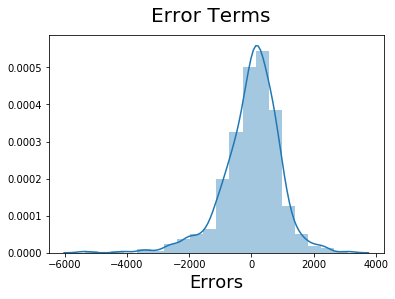

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()

#computing the residual value y_train (actual) and y_train_cnt(predicted) value.
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We can see that the distribution of the residual values is centered around 0 and is normally distributed.

# Making Predictions

<b> Applying the scaling on the test sets

In [102]:
#creating list of numeric variables
num_vars = ['atemp','hum','windspeed']

# Fit on Data
data_test[num_vars]= scaler.fit_transform(data_test[num_vars])
data_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,mon,sat,sun,thurs,tue,wed,clear,mist&cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.530942,0.508750,0.418870,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.228159,0.201253,0.188111,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333829,0.358469,0.283817,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547913,0.494200,0.402533,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.720622,0.651165,0.524362,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Dividing into X_test and y_test

In [103]:
y_test = data_test.pop('cnt')
X_test = data_test

In [104]:
X_train_new.columns

Index(['yr', 'atemp', 'windspeed', 'spring', 'July', 'mist&cloudy'], dtype='object')

In [105]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [106]:
# Making predictions
y_pred = lm_10.predict(X_test_new)

In [107]:
#evaluate by computing R2
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.760869243062406

As we can see that Rsquare on test set is 76% , while on the training set we got Rsquare of 78% and adj Rsquare of 77%. There is almost 1% difference, which is quite reasonable and the test data effeciently learns from the train data.

<b> Hence, We can see that the equaltion of our best fitted line is <br>
    " cnt = 2091(yr) + 4003(atemp) - 1449(windspeed) - 1157(spring) - 714(July)- 580(mist&cloudy)" <br>
    
- if atemp increases by 1 cnt increases by 4003 times. <br>
- if windpeed becomes 1 then cnt is decrease by 1449.4 <br>
    
  To make this model better,we could add new features : <br>
 adding new features age group, payment options, distance between the location of the bikes and riders etc. 


In [108]:
# parameters of the final model
print(lm_10.params)

const          2370.464180
yr             2091.987441
atemp          4002.940596
windspeed     -1449.243082
spring        -1157.245869
July           -714.959567
mist&cloudy    -580.042818
dtype: float64


# Model Evaluation

Text(27.125, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

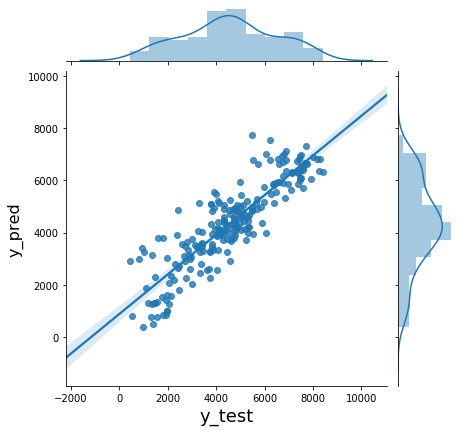

In [109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.jointplot(y_test,y_pred,kind="reg")
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

<h2> Conclusion </h2>

<b>As we can see that Rsquare on test set is 76% , while on the training set we got Rsquare of 78% and adj Rsquare of 77%. There is almost 1% difference, which is quite reasonable and the test data effeciently learns from the train data.<br>

<b> Hence, We can see that the equaltion of our best fitted line is <br>
" cnt = 2370+ 2091(yr) + 4003(atemp) - 1449(windspeed) - 1157(spring) - 714(July)- 580(mist&cloudy)" <br>
- if atemp increases by 1 cnt increases by 4003 times. <br>
- if windpeed becomes 1 then cnt is decrease by 1449.4 <br>
    
To make this model better,we could add new features : <br>
adding new features age group, payment options, distance between the location of the bikes and riders etc. <br>